# Model Evaluation / Comparison

In [1]:
# my virtual environments are rarely properly connected to jupyter so this fixes that. 
# you prolly won't need this cell but running it won't hurt anything either
import sys
import os
current_dir = os.getcwd()  # Get the current working directory
venv_dir = os.path.join(current_dir, 'venv') 
python_version = str(sys.version_info.major) + '.' + str(sys.version_info.minor)
site_packages_path = os.path.join(venv_dir, 'lib', 'python' + python_version, 'site-packages')
sys.path.append(site_packages_path) 

In [2]:
import torch
from model_comparison import  plot_column_from_csv, evaluate_models, format_model_output

In [3]:
models_to_compare = [
    'FHA_1m_short_and_thicc'
]

### first up we'll look at loss curves
notice that even with a log scale I had to splice out the first 5% to make the lines distinct

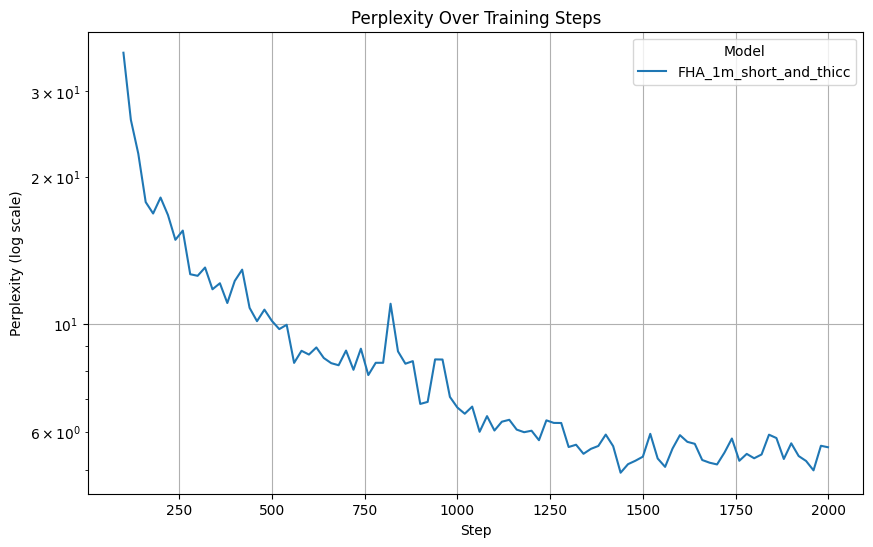

In [4]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True, trim_percentage=5)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output

In [5]:
topk = 5
results, correct_data = evaluate_models(models_to_compare, topk)

918.592K parameters
ModelConfig(dim=64, device='cpu', tokenizer='bpe', vocab_len=8192, num_layers=4, second_resid_norm=False, mlp_hidden_mult=8, mlp_bias=False, mlp_nonlinearity='SiLU', mlp_gated=True, num_q_heads=3, num_kv_heads=1, head_dim=64, theta=10000, max_seq_len=512, fractal_split=2, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06, max_batch_size=1)
Model(
  (token_embedder): Embedding(8195, 64)
  (layers): ModuleList(
    (0-3): 4 x Layer(
      (pre_attn_norm): Norm()
      (attn): FHA(
        (Wq): Linear(in_features=64, out_features=192, bias=False)
        (Wk): Linear(in_features=64, out_features=64, bias=False)
        (Wv): Linear(in_features=64, out_features=64, bias=False)
        (Wo): Linear(in_features=192, out_features=64, bias=False)
      )
      (pre_mlp_norm): Norm()
      (mlp): MLP(
        (Wup): Linear(in_features=64, out_features=341, bias=False)
        (Wgate): Linear(in_features=64, out_features=341, bias=False

In [6]:
# Display the results for each model
for name, data in results.items():
    format_model_output(name, data, topk, data['tokenizer'], correct_data)

Model: FHA_1m_short_and_thicc
  - Top-5 Accuracy: 46.88%
True	Predicted
Once	['Once', 'On', 'Lily', 'To', 'Sara']
 	['', ', ', '. ', '.\n', 'ar']
th	['upon', 'th', '', 'happily', 'ar']
er	['er', '', '', 'em', 'at']
e	['', 'er', 'es', 'op', '']
 	['', ', ', 'ir', '. ', "'s"]
was	['was', 'were', 'had', 'like', 'live']
 	['', '. ', ', ', ' 3', '.\n']
a	['', 'an', 'in', 'th', 'feeling']
 	['', ', ', ' 3', "'s", '. ']
mo	['li', 'big', 'gi', 'boy', 'sm']
mm	['us', '', 'mm', '', 'th']
y	['', 'er', 'mm', 'ie', 'el']
 	['', '. ', 'ing', ', ', '']
and	['on', 'in', 'and', 'ca', 'na']
 	['', ', ', '. ', ' "', '.\n']
her	['her', '', 'th', 'sh', 'pla']
 	['', '. ', ', ', '', ', "']
ado	['mo', 'fr', 'da', 'room', 'favorite']
ra	['', 'ra', 'ual', 'or', 'up']
bl	['', '', 'ss', 'bl', '']
e	['', 'ow', 'oo', 'es', 'ac']
 	['', '. ', ', ', '.\n', "'s"]
thr	['to', 'fo', 'th', 'and', 'in']
ee	['ee', 'oo', '', 'eat', 'ip']



# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms